In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import glorot_normal
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import tensorflow as tf

# Loading the CIFAR-10 dataset
from keras.datasets import cifar10

## 1. Write your code for training and testing
## 2. Write code for plotting
## 3. Write code for confusion matrix.




In [2]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', input_shape=[32,32,3], activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [3]:
(X_train , y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mean = np.mean(X_train, axis=(0,1,2,3))
std  = np.std(X_train, axis=(0,1,2,3))
X_train = (X_train - mean)/(std + 1e-7)
X_test = (X_test - mean)/(std + 1e-7)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
batch_size = 25
epoch = 10
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epoch, verbose=True, validation_split=0.25)


c:\users\dives\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
1500/1500 [==============================] - 45s 23ms/step - loss: 2.2961 - accuracy: 0.1023 - val_loss: 1.9658 - val_accuracy: 0.2393

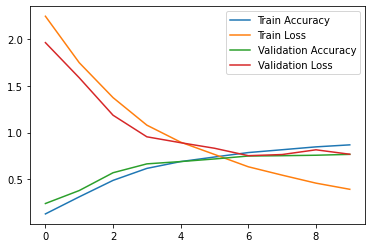

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [10]:
pred = model.predict(X_test)
matrix = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
accuracy = classification_report(y_test.argmax(axis=1), pred.argmax(axis=1))
print(matrix)
print(accuracy)

[[694   6 100  22   8   2   7   4 147  10]
 [  4 926   2   5   1   0   5   0  41  16]
 [ 35   0 733  68  35  43  52  12  19   3]
 [ 16   2  77 687  31  68  59  18  29  13]
 [  8   1  91  95 703  22  44  23  12   1]
 [  2   0  73 233  20 621  17  19  10   5]
 [  2   4  51  82  21  15 816   0   9   0]
 [ 18   3  35  85  57  55   3 728   4  12]
 [ 22   8   9   6   1   2   3   2 941   6]
 [ 37 110   3  11   1   0  11   3  37 787]]
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1000
           1       0.87      0.93      0.90      1000
           2       0.62      0.73      0.67      1000
           3       0.53      0.69      0.60      1000
           4       0.80      0.70      0.75      1000
           5       0.75      0.62      0.68      1000
           6       0.80      0.82      0.81      1000
           7       0.90      0.73      0.80      1000
           8       0.75      0.94      0.84      1000
           9       0.92     